In [3]:
import pandas as pd
import numpy as np
import os
import json
import csv

TL_sentence_path = r'C:\Users\edcrf\sentence_dataTL.csv'
VL_sentence_path = r'C:\Users\edcrf\sentence_dataVL.csv'

# data파일 불러오기
TL_sentence_data = pd.read_csv(TL_sentence_path, encoding='utf-8')
VL_sentence_data = pd.read_csv(VL_sentence_path, encoding='utf-8')

# 중복 제거, Pronuncication 열은 필요 없다고 생각
TL_sentence_data.drop('Pronunciation', axis=1, inplace=True)
TL_sentence_data = TL_sentence_data.drop_duplicates().reset_index(drop=True)
VL_sentence_data.drop('Pronunciation', axis=1, inplace=True)
VL_sentence_data = VL_sentence_data.drop_duplicates().reset_index(drop=True)

In [4]:
all_sentences = TL_sentence_data.append(VL_sentence_data, ignore_index=True)
print(len(TL_sentence_data), len(VL_sentence_data), len(all_sentences))

323371 44584 367955


In [5]:
from tqdm import tqdm

# 형태소 분석기로 Okt를 사용
import konlpy
from konlpy.tag import Kkma, Komoran, Okt, Hannanum
okt = Okt()

standard_sentences = all_sentences['Standard']
dialect_sentences = all_sentences['Dialect']

In [13]:
# 방언 문장과 표준어 문장 각각 형태소 분석 진행
standard_okt = []
dialect_okt = []

stop_words = ['이', '에', '는', '가', '도', '을', '뭐', '은','하고','게','에는','그', '를', '것', '으로','로']

for i in tqdm(range(0, len(all_sentences))):
    standard_tokens = [token for token in okt.morphs(standard_sentences[i]) if token not in stop_words]
    dialect_tokens = [token for token in okt.morphs(dialect_sentences[i]) if token not in stop_words]
    standard_okt.append(standard_tokens)
    dialect_okt.append(dialect_tokens)

100%|██████████| 367955/367955 [19:44<00:00, 310.58it/s]


In [14]:
standard_okt[50]

['내일', '잔치', '있어서', '날', '많이', '추우면', '안', '될텐데', '내일', '많이', '춥다', '하더냐']

In [15]:
dialect_okt[50]

['내일',
 '잔치',
 '있어가',
 '날',
 '마이',
 '추',
 '우마',
 '안',
 '델낀디',
 '내일',
 '많이',
 '춥다',
 '카더',
 '나']

In [16]:
# 토큰화된 방언 문장과 표준어 문장을 각각 csv파일로 저장
with open('st_stopwords_okt_all.csv', 'w', encoding='utf-8', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(standard_okt)

with open('di_stopwords_okt_all.csv', 'w', encoding='utf-8', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(dialect_okt)

In [74]:
# # csv저장을 위해 리스트를 DataFrame으로 변환
# standard_okt_df = pd.DataFrame(standard_okt)
# dialect_okt_df = pd.DataFrame(dialect_okt)

# standard_okt_df.to_csv(r'C:\Users\edcrf\standard_okt.csv', index=False, sep =',')
# dialect_okt_df.to_csv(r'C:\Users\edcrf\dialect_okt.csv', index=False, sep =',')

In [ ]:
# # csv파일로 저장한 토큰화된 결과 불러오기
# standard_okt_data = pd.read_csv(r'C:\Users\edcrf\standard_okt.csv')
# dialect_okt_data = pd.read_csv(r'C:\Users\edcrf\dialect_okt.csv')

In [6]:
# 저장된 토큰화 데이터 불러오기
standard_okt_data = []
dialect_okt_data = []

with open('st_stopwords_okt_all.csv', 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        standard_okt_data.append(row)

with open('di_stopwords_okt_all.csv', 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        dialect_okt_data.append(row)

In [7]:
# 방언 문장의 토큰과 표준어 문장의 토큰 저장
dialect_tokens = []
standard_tokens = []

for i in range(0, len(all_sentences)):
    for standard_word in standard_okt_data[i]:
        standard_tokens.append(standard_word)
    
    for dialect_word in dialect_okt_data[i]:
        dialect_tokens.append(dialect_word)

In [8]:
# 각 리스트에서 중복을 제거
unique_standard_tokens = []
unique_dialect_tokens = []
seen1 = set()
seen2 = set()

for word in standard_tokens:
    if word not in seen1:
        unique_standard_tokens.append(word)
        seen1.add(word)

for word in dialect_tokens:
    if word not in seen2:
        unique_dialect_tokens.append(word)
        seen2.add(word)


In [11]:
print(f"중복 제거 전 토큰 수 >> standard: {len(standard_tokens)}, dialect: {len(dialect_tokens)}")
print(f"중복 제거 후 토큰 수 >> standard: {len(unique_standard_tokens)}, dialect: {len(unique_dialect_tokens)}")

중복 제거 전 토큰 수 >> standard: 5250260, dialect: 5467840
중복 제거 후 토큰 수 >> standard: 91735, dialect: 111868


In [9]:
tokens = standard_tokens + dialect_tokens

print(len(tokens))

12178960


In [10]:
all_tokens = standard_tokens + dialect_tokens

unique_all_tokens = []
seen3 = set()

for word in all_tokens:
    if word not in seen3:
        unique_all_tokens.append(word)
        seen3.add(word)

In [11]:
print(f"중복 제거 전 방언과 표준어의 토큰 합친 수: {len(all_tokens)}")
print(f"중복 제거 후 방언과 표준어의 토큰 합친 수: {len(unique_all_tokens)}")

중복 제거 전 방언과 표준어의 토큰 합친 수: 12178960
중복 제거 후 방언과 표준어의 토큰 합친 수: 128708


## 불용어 제거하지 않았을 때
### 중복 제거 x -> standard: 6536600, dialect: 6794654
##### => 전체 토큰 수: 13331254
### 중복 제거 o -> standard: 91751, dialect: 111884
##### => 전체 토큰 수(중복 제거 x): 13331254, (중복 제거 o): 120152

---

## 불용어 제거했을 때
### 중복 제거 x -> standard: 5250260, dialect: 5467840
##### => 전체 토큰 수: 10718100
### 중복 제거 o -> standard: 91735, dialect: 111868
##### => 전체 토큰 수(중복 제거 x): 10718100, (중복 제거 o): 120136

In [12]:
from collections import Counter

# 중복을 하나도 제거하지 않았을 때의 단어 빈도수를 계산
word_counts = Counter(tokens)

# 빈도수 높은 순서대로 정렬
sorted_word = sorted(word_counts, key=word_counts.get, reverse=True)

print(len(sorted_word))

128708


In [17]:
sorted_word[:20]

['안',
 '거',
 '때',
 '또',
 '고',
 '들',
 '많이',
 '우리',
 '좀',
 '다',
 '한',
 '저',
 '내',
 '나',
 '이제',
 '집',
 '에서',
 '사람',
 '잘',
 '그런']

In [26]:
### 단어 빈도수가 높은 것들을 출력해보니 방언과 표준어의 관계와 전혀 관련없는 조사들이 많이 포함됨
### 따라서 불용어 처리를 통해 제거가 필요함
# stop_words = ['이', '에', '는', '가', '도', '을', '뭐', '은','하고','게','에는','그', '를', '것', '으로','로']

In [13]:
word_to_id = {word: index + 1 for index, word in enumerate(unique_all_tokens)}
id_to_word = {index: word for word, index in word_to_id.items()}

In [15]:
len(word_to_id)

## all_tokens를 이용했을 때와
## unique_all_tokens 이요했ㅇ을 때 비교

120136

In [14]:
# word_to_id csv로 저장
with open('word_to_id_all.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    for word, idx in word_to_id.items():
        writer.writerow([word, idx])

# id_to_word csv로 저장
with open('id_to_word_all.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    for idx, word in id_to_word.items():
        writer.writerow([idx, word])

In [15]:
# 방언과 표준어 문장을 정수 인덱스로 변환
dialect_indices = [[word_to_id[token] for token in tokens] for tokens in dialect_okt_data]
standard_indices = [[word_to_id[token] for token in tokens] for tokens in standard_okt_data]

In [16]:
# 방언과 표준어 문장에서 최대 길이를 찾음 => 패딩을 적용하기 위해
max_dialect_length = max(len(sentence) for sentence in dialect_indices)
max_standard_length = max(len(sentence) for sentence in standard_indices)

print(f"dialect 최대 길이: {max_dialect_length}, standard 최대 길이: {max_standard_length}")

dialect 최대 길이: 259, standard 최대 길이: 260


In [17]:
# 방언과 표준어 문장의 평균 길이를 계산
avg_dialect_length = sum(len(sentence) for sentence in dialect_indices) / len(dialect_indices)
avg_standard_length = sum(len(sentence) for sentence in standard_indices) / len(standard_indices)

print(f"dialect 평균 길이: {avg_dialect_length}, standard 평균 길이: {avg_standard_length}")

dialect 평균 길이: 16.88242584011632, standard 평균 길이: 16.216621597749725


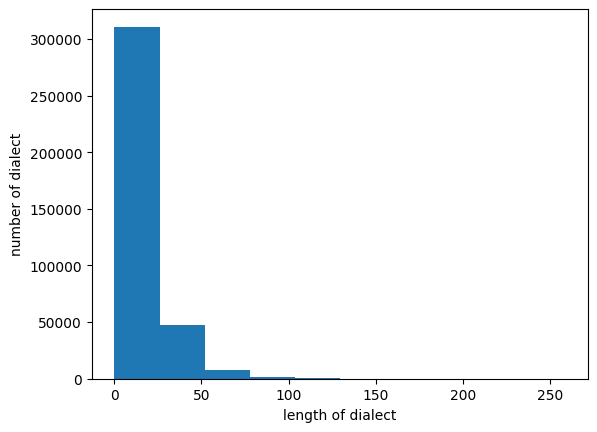

In [18]:
# 방언 문장의 길이와 그 길이에 해당되는 문장의 수
import matplotlib
import matplotlib.pyplot as plt

plt.hist([len(sentence) for sentence in dialect_indices], bins=10)
plt.xlabel('length of dialect')
plt.ylabel('number of dialect')
plt.show()

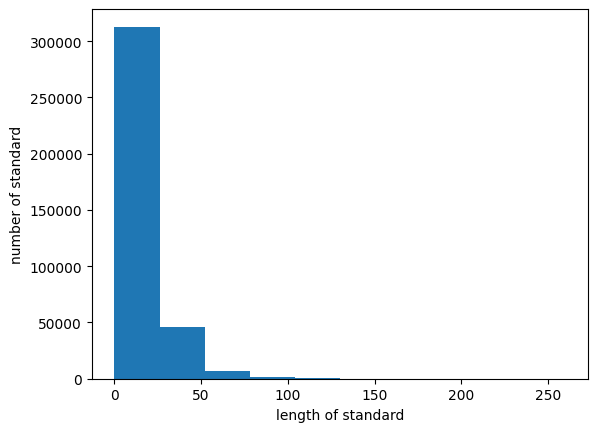

In [19]:
# 표준어 문장의 길이와 그 길이에 해당되는 문장의 수
plt.hist([len(sentence) for sentence in standard_indices], bins=10)
plt.xlabel('length of standard')
plt.ylabel('number of standard')
plt.show()

In [20]:
# 최대 길이로 모든 문장의 길이를 패딩하면 규모가 너무 커짐
## 그래서 95%까지만 커버칠 수 있는 길이를 찾음
### 함수 선언
def threshold_len_80(max_len, data):
    sentence_count=0
    for sentence in data:
        if(len(sentence) <= max_len):
            sentence_count += 1
    return sentence_count/len(data)*100

In [23]:
dialect_max_len = 41
dialect_ratio = threshold_len_80(dialect_max_len, dialect_indices)

standard_max_len = 41
standard_ratio = threshold_len_80(standard_max_len, standard_indices)

print(f"dialect 중 {dialect_max_len} 이하인 비율은 {dialect_ratio}")
print(f"standard 중 {standard_max_len} 이하인 비율은 {standard_ratio}")

dialect 중 41 이하인 비율은 95.05184057833159
standard 중 41 이하인 비율은 95.27360682692178


In [24]:
dialect_padding = []
standard_padding = []

for sentence in dialect_indices:
    # sentence 중 dialect_max_len 보다 작은 것은 0으로 제로 패딩
    if len(sentence) <= dialect_max_len:
        padded_sentence = sentence + [0] * (dialect_max_len - len(sentence))
        dialect_padding.append(padded_sentence)
    # sentence 중 dialect_max_len 보다 큰 것은 dialect_max_len으로 자름
    else:
        padded_sentence = sentence[:dialect_max_len]
        dialect_padding.append(padded_sentence)


for sentence in standard_indices:
    # sentence 중 standard_max_len 보다 작은 것은 0으로 제로 패딩
    if len(sentence) <= standard_max_len:
        padded_sentence = sentence + [0] * (standard_max_len - len(sentence))
        standard_padding.append(padded_sentence)
    # sentence 중 standard_max_len 보다 큰 것은 dialect_max_len으로 자름
    else:
        padded_sentence = sentence[:standard_max_len]
        standard_padding.append(padded_sentence)

In [25]:
d_M_l = max(len(sentence) for sentence in dialect_padding)
s_M_l = max(len(sentence) for sentence in standard_padding)
d_m_l = min(len(sentence) for sentence in dialect_padding)
s_m_l = min(len(sentence) for sentence in standard_padding)

print(f"standard padding 리스트의 최대 길이: {s_M_l}")
print(f"dialect padding 리스트의 최대 길이: {d_M_l}")
print(f"standard padding 리스트의 최소 길이: {s_m_l}")
print(f"dialect padding 리스트의 최소 길이: {d_m_l}")

standard padding 리스트의 최대 길이: 41
dialect padding 리스트의 최대 길이: 41
standard padding 리스트의 최소 길이: 41
dialect padding 리스트의 최소 길이: 41


In [26]:
# 정수화된 방언 문장 csv로 저장
with open('dialect_padding_all.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    for indices in dialect_padding:
        writer.writerow(indices)

# 정수화된 표준어 문장 csv로 저장
with open('standard_padding_all.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    for indices in standard_padding:
        writer.writerow(indices)